The first notebook "1 Create RIS from Query" collates the bibliometric data.

In this notebook we filter out unwanted records

In [1]:
%run "Common Setup.ipynb"

In [2]:
query_id = "9c6ab9828cde626ed770f2efd71c7f17_1970-01-01-2018-12-31"
RC = wosis.load_query_results("{}/{}.txt".format(TMP_DIR, query_id))
num_records = []

In [3]:
corpora_df = wosis.rc_to_df(RC)
num_records.append(len(corpora_df.id))

In [4]:
filtered_df, removed = wosis.remove_empty_DOIs(corpora_df, return_removed=True)

Removing 1571 records with no DOIs


In [5]:
num_records.append(len(filtered_df.id))

In [6]:
# Remove conference publications
filtered_df = wosis.remove_by_journals(filtered_df, ["CONFERENCE", "WORKSHOP", "PROCEEDINGS", "SYMPOSIUM", "CONGRESS"])

CONFERENCE: 129
WORKSHOP: 8
PROCEEDINGS: 11
SYMPOSIUM: 13
CONGRESS: 1


In [7]:
num_records.append(len(filtered_df.id))
filtered_rc = wosis.extract_recs(filtered_df.id, RC)

In [8]:
# Save filtered collection to temporary directory
wosis.export_ris_file(filtered_rc, '{}/initial_filtered_corpora.txt'.format(TMP_DIR))

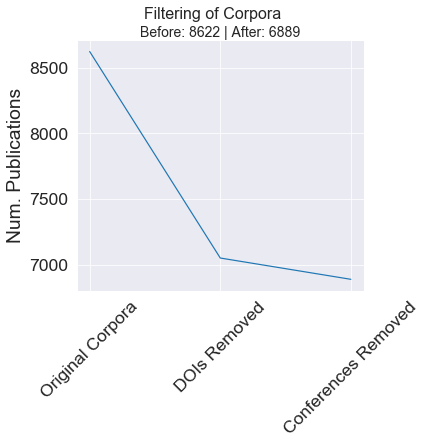

In [9]:
plt.figure(figsize=(6,6))
plt.tight_layout()
plt.suptitle('Filtering of Corpora', fontsize=16, y=1.02)
plt.title('Before: {} | After: {}'.format(len(RC), len(filtered_df.id)), fontsize=14, y=0.99)
plt.ylabel('Num. Publications')
plt.xticks(rotation=45)
reduction = plt.plot(['Original Corpora', 'DOIs Removed', 'Conferences Removed'], num_records)
plt.tight_layout()
plt.savefig('{}/initial_filtering.png'.format(FIG_DIR), dpi=300, bbox_inches="tight")
